# DIABETES PARA TODOS 
EN ESTE EJERCICIO SE ESTUDIAN LOS DIFERENTES ESTILOS DE VIDA QUE SE OBTUVIERON PARA PODER ANALIZAR LOS RESULTADOS Y PODER OBTENER UN RESULTADO SOBRE SI ES PROBABLE O NO QUE TENGA DIABETES.
SE CUENTAN CON MULTIPLES DATOS DE LOS CUALES ESTAN CLASIFICACION COMO `0` SI EL RESULTADO ES NEGATIVO Y `1` SI EL RESULTADO ES POSITIVO.

SE UTILIZARA UNA SVM DE CLASIFICACION.


In [1]:
# Manipulación y analisis de datos
import pandas as pd
# Manipulacion de datos numericos
import numpy as np
# Para medición del tiempo que toma ejecutar los procesos
from time import time
# Para separar datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Librería para SVM
from sklearn.svm import SVC
# Medición de precisión
from sklearn.metrics import accuracy_score, confusion_matrix
# Generar gráficos
import matplotlib.pyplot as plt

DESPUES DE IMPORTAR LA LIBRERIAS NECESARIAS, COMENZAMOS CARGANDO LOS DATOS DESDE UN CSV PARA PODER MANIPULAR LOS DATOS Y LEERLOS.

In [2]:
# Leemos el set de datos y lo cargamos en la variable df, que es un DataFrame de pandas
diabetes_df = pd.read_csv('diabetes_binary.csv')
# Mostrar información sobre el set de datos
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

HAY VARIAS FUNCIONES QUE PERMITEN EXPLORAR LOS DATOS CON LOS QUE SE VAN A TRABAJAR, EN ESTE CASO SE PUEDEN MOSTRAR LOS PRIMERO 5 DATOS QUE TIENE EL CSV.

In [3]:
diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
TAMBIEN SE PUEDEN CONTAR LOS VALORES QUE SE TIENE EN UNA MISMA COLUMNA.

In [4]:
# Contar los valores únicos de una columna en un DataFrame
diabetes_df['Sex'].value_counts()

Sex
0.0    141974
1.0    111706
Name: count, dtype: int64

LA COLUMNA QUE SE TOMARA EN CUENTA ES LA PRIMERA EN DONDE NOS INDICA LAS PERSONAS TIENE O NO DIABETES PARA PODER HACER EL ANALISIS.

In [5]:
diabetes_df['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

PARA REALIZAR UN ENTRENAMIENTO ES NECESARIO SEPARAR LAS CARACTERISTICAS DE LAS ETIQUETAS. SE CLASIFICAN COMO `X` Y `Y`

In [6]:
# Crearemos un nuevo df llamado X (notar mayus) con las columnas de características
# Se obtiene generando una lista de columnas del df a utilizar
lista_caract = [
   'HighBP',                
   'HighChol',              
   'CholCheck',            
   'BMI',                   
   'Smoker'                
     
]
# Luego tomando esa lista del df original
X = diabetes_df[lista_caract]
# Mostraremos los primeros cinco registros para conocer cómo se compone X
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker
0,1.0,1.0,1.0,40.0,1.0
1,0.0,0.0,0.0,25.0,1.0
2,1.0,1.0,1.0,28.0,0.0
3,1.0,0.0,1.0,27.0,0.0
4,1.0,1.0,1.0,24.0,0.0


EN ESTE CAMPO SE UTILIZA LA COLUMNA QUE SE DESEA UTILIZAR COMO RESULTADO EN EL QUE SABREMOS SI EL DIAGNOSTICO DE DIABETES ES POSITIVO O NO.

In [7]:
# Utilizaremos el mismo procedimiento para generar y
lista_etiq = ['Diabetes_binary']
y = diabetes_df[lista_etiq]
y.head()

,Diabetes_binary
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


YA QUE SE OBTIENEN LOS DATOS `X` Y `Y` SE PROCEDE A SEPARARLOS EN CONJUNTO DE ENTRENAMIENTO PARA APRENDER Y PRUEBA PARA VALIDAR.
ESTE PROCESO LO REALIZAREMOS CON LA FUNCION `train_test_split`.

In [16]:
# Separar en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.1,
    test_size=0.1
    
)

In [17]:
# Aqui se mostraran los datos que se van a utilizar en el entrenamiento
X_train.shape

(25368, 5)

In [18]:
y_train.shape

(25368, 1)

In [19]:
# Luego, la cantidad de datos a utilizar para validar
X_test.shape

(25368, 5)

In [20]:
y_test.shape

(25368, 1)



# SVC
SE UTILIZARA UN SVC PARA CLASIFICACION QUE IMPORTAMOS EN EL INICIO Y UN KERNEL LINEAL PARA QUE EL PROCESO SEA MAS RAPIDO.

In [21]:
# Definició del modelo que llamaremos clf
clf = SVC(kernel='linear')




PARA HACER UN ENTRENAMIENTO DE UN MODELO SKLEARN BASTA CON LLAMAR EL METODO FIT CON EL CUAL SE ENCUENTRAN LAS RELACIONES ENTRE `X` Y `Y`

In [22]:
# Guardamos el registro del momento en el que empezamos el entrenamiento
hora_inicio = time()

# Iniciamos el entrenamiento ejecutando el metodo fit
# Los valores que enviamos son los valores de X y y
#
# El .ravel() que final de y.values es un pequeño truco para cambiar su forma
# esto permite convertir una matriz de dos dimensiones en una sola dimesión,
# con ello, cada elemento de esta nueva matriz corresponde a un registro de X
clf.fit(X_train.values, y_train.values.ravel())

# Imprimimos el tiempo tomado para el entrenamiento
print("Entrenamiento terminado en {} segundos".format(time() - hora_inicio))

Entrenamiento terminado en 26.1796932220459 segundos


CUANDO EL ENTRENAMIENTO TERMINE PROCEDEMOS A HACER MEDIR SU PRECISION, PARA ESO SE INTENTARA PREDECIR DE NUESTRAS X Y Y DE PRUEBA.

In [23]:
# Otra vez guardaremos registro del tiempo que nos toma crear esta predicción
hora_inicio = time()
# Iniciamos la predicción con nuestra X de prueba
y_pred = clf.predict(X_test)
# Mostramos el tiempo tomado para la predicción
print("Predicción terminada en {} segundos".format(time() - hora_inicio))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Predicción terminada en 7.6167871952056885 segundos


UNA VEZ TERMINADA LA PREDICCION, EVALUAMOS  LA PRECISION CON LA FUNCION `accuracy_score`, ESTO NOS MOSTRARA EL PROCENTAJE DE PREDICCIONES CORRECTAS.

In [24]:
# Evaluamos la precisión 
accuracy_score(y_test, y_pred)

0.8601387574897509



# MATRIZ DE CONFUSION
REALIZAMOS UNA MATRIZ DE CONFUSION PARA PODER ENTENDER MEJOR EL RENDIMIENTO DE NUESTRO MODELO, SE ENCARGARA DE COMPARAR LA CANTIDAD DE ACIERTOS DE PRUEBA Y DE DATOS CALCULADOS (PREDICCION).

In [25]:
# La función confusion_matrix recibe las "respuestas correctas" y nuestras predicciones
# genera una matriz que indica, para cada clase, la cantidad de predicciones correctas e incorrectas
conf_diabetes = confusion_matrix(y_test, y_pred)
conf_diabetes

array([[21820,     0],
       [ 3548,     0]], dtype=int64)

LA SIGUIENTE PARTE MOSTRARA DE FORMA GRAFICA LOS RESULTADOS OBTENIDOS.

In [26]:
def plot_cm(cm, classes):
    """Esta función se encarga de generar un gráfico con nuestra matriz de confusión.
    cm es la matriz generada por confusion_matrix
    classes es una lista que contiene las posibles clases que puede predecir nuestro modelo
    """
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de confusión')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for indice_fila, fila in enumerate(cm):
        for indice_columna, columna in enumerate(fila):
            if cm[indice_fila, indice_columna] > thresh:
                color = "white"
            else:
                color = "black"
            plt.text(
                indice_columna,
                indice_fila,
                cm[indice_fila, indice_columna],
                color=color,
                horizontalalignment="center"
            )
    plt.ylabel("Valores reales")
    plt.xlabel("Valores calculados")
    plt.show()

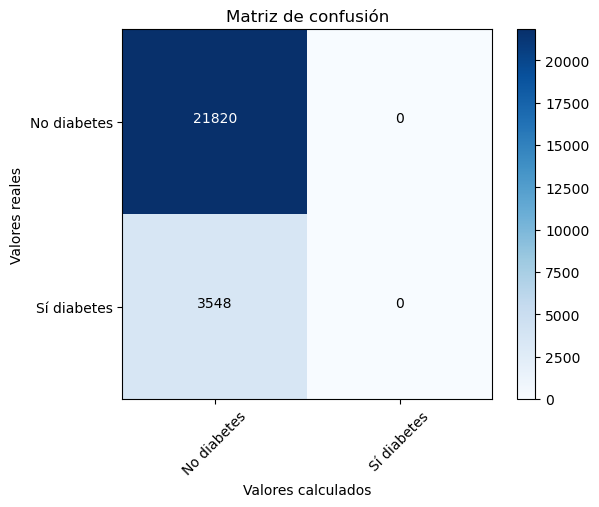

In [27]:
# Generamos el gráfico llamando la función que creamos y enviando los parámetros
# cm = nuestra matriz de confusión (conf_diabetes)
# classes = las clases a predecir (si tienen diabetes o no)
plot_cm(conf_diabetes, ['No diabetes', 'Sí diabetes'])